**10: Datetimes & Timedeltas**

In [9]:
import pandas as pd

In [116]:
eth_df = pd.read_csv('ETH_1h.csv')
eth_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


***
Casting to datetime:
- Uses pd.to_datetime() method -- New format will be in YYYY-MM-DD HH:MM:SS
- If date data is not in a conventional format, the format has to be specified

In [118]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'], format='%Y-%m-%d %I-%p')

In [83]:
eth_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


The Date column here has now been casted into the datetime type.

Alternatively, it is also possible to parse/cast the dates directly from when the csv file is read.

d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p') <br>
df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

***
Inserting a Day column:

In [120]:
eth_df.insert(1, 'Day', eth_df['Date'].dt.day_name())
eth_df

,Date,Day,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,Friday,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,Friday,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,Saturday,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,Saturday,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,Saturday,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,Saturday,ETHUSD,275.01,275.01,271.00,274.83,824362.87


***
Accessing Dates:

In [45]:
eth_df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [47]:
eth_df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [53]:
eth_df['Date'].max() - eth_df['Date'].min()
#returns a timedelta object (date - date = timedelta)

Timedelta('986 days 09:00:00')

Filters can also be used to search for dates:
- Conditionals for dates later than March 2020
- Conditionals for all info on 4 March 2020

Note the only way for pandas to intepret conditionals on dates/times (more than, equals etc.) is for them to be datetime objects, so they must be converted first.

In [55]:
filt = (eth_df['Date'] >= '2020-03')
eth_df.loc[filt]

,Date,Day,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,Friday,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,Friday,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...,...
304,2020-03-01 04:00:00,Sunday,ETHUSD,223.40,224.63,221.51,222.41,824455.51
305,2020-03-01 03:00:00,Sunday,ETHUSD,223.24,225.26,222.21,223.40,1754070.34
306,2020-03-01 02:00:00,Sunday,ETHUSD,223.56,225.78,222.75,223.24,1925669.30
307,2020-03-01 01:00:00,Sunday,ETHUSD,218.20,224.00,215.99,223.56,2612868.90


In [71]:
filt2 = (eth_df['Date'] >= '2020-03-04') & (eth_df['Date'] < '2020-03-05')
eth_df.loc[filt2]

,Date,Day,Symbol,Open,High,Low,Close,Volume
213,2020-03-04 23:00:00,Wednesday,ETHUSD,223.38,224.92,223.38,224.56,869815.54
214,2020-03-04 22:00:00,Wednesday,ETHUSD,222.87,223.85,222.77,223.38,469882.47
215,2020-03-04 21:00:00,Wednesday,ETHUSD,221.69,223.14,221.18,222.87,408675.33
216,2020-03-04 20:00:00,Wednesday,ETHUSD,222.62,222.62,221.03,221.69,869816.14
217,2020-03-04 19:00:00,Wednesday,ETHUSD,222.52,223.08,221.90,222.62,548443.41
218,2020-03-04 18:00:00,Wednesday,ETHUSD,223.20,223.28,221.38,222.52,674728.87
219,2020-03-04 17:00:00,Wednesday,ETHUSD,222.84,223.81,222.08,223.20,670203.58
220,2020-03-04 16:00:00,Wednesday,ETHUSD,221.97,223.15,220.39,222.84,1522344.97
221,2020-03-04 15:00:00,Wednesday,ETHUSD,223.19,224.32,220.92,221.97,1766542.88
222,2020-03-04 14:00:00,Wednesday,ETHUSD,224.63,225.59,222.53,223.19,1429600.02


By setting date to the index, there is no longer a need for filters. Note unlike the video, .loc is still required when using dates as indexes.
- Column can also be specified to return a series

In [132]:
eth_df.set_index('Date', inplace=True)
eth_df

,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-03-13 20:00:00,Friday,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,Friday,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,Friday,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
2020-03-13 17:00:00,Friday,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 16:00:00,Friday,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,Saturday,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
2017-07-01 14:00:00,Saturday,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 13:00:00,Saturday,ETHUSD,274.83,274.93,265.00,268.79,3010787.99


In [134]:
eth_df.loc['2017'].head(3)

,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2017-12-31 23:00:00,Sunday,ETHUSD,743.01,743.01,740.33,741.27,2671091.87
2017-12-31 22:00:00,Sunday,ETHUSD,746.08,747.79,743.00,743.01,2514400.23
2017-12-31 21:00:00,Sunday,ETHUSD,750.11,751.00,743.96,746.08,2908764.02


In [136]:
eth_df.loc['2020-03-01'].tail(3)

,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-03-01 02:00:00,Sunday,ETHUSD,223.56,225.78,222.75,223.24,1925669.30
2020-03-01 01:00:00,Sunday,ETHUSD,218.20,224.00,215.99,223.56,2612868.90
2020-03-01 00:00:00,Sunday,ETHUSD,217.31,221.26,216.98,218.20,1719900.97


In [148]:
eth_df.loc['2019-10-15']['Close']
#Accessing all closing prices on 2019, October 15.

Date
2019-10-15 23:00:00    180.58
2019-10-15 22:00:00    179.20
2019-10-15 21:00:00    178.70
2019-10-15 20:00:00    177.79
2019-10-15 19:00:00    180.12
2019-10-15 18:00:00    180.47
2019-10-15 17:00:00    179.75
2019-10-15 16:00:00    180.20
2019-10-15 15:00:00    183.67
2019-10-15 14:00:00    181.81
2019-10-15 13:00:00    183.61
2019-10-15 12:00:00    183.89
2019-10-15 11:00:00    183.77
2019-10-15 10:00:00    183.85
2019-10-15 09:00:00    182.55
2019-10-15 08:00:00    183.00
2019-10-15 07:00:00    183.65
2019-10-15 06:00:00    184.59
2019-10-15 05:00:00    185.59
2019-10-15 04:00:00    185.13
2019-10-15 03:00:00    185.18
2019-10-15 02:00:00    186.54
2019-10-15 01:00:00    186.08
2019-10-15 00:00:00    186.43
Name: Close, dtype: float64

***
Resampling Data:
- Resampling allows for the separation of data into groups based on a time period (day, month, quarter etc.). The notation for these time periods can be found in the documentation
- Methods like .max can then be applied on the object, which returns a series based on the outputs of that method for every single of these groups
- Somewhat similar to Grouping (see 09_Grouping and Aggregation)

In [200]:
avg_closing_prices = eth_df['Close'].resample('W').mean()
#ME for month. mean() computes the average for closing prices for all days of that week

In [196]:
avg_closing_prices

Date
2017-07-02    268.202162
2017-07-09    261.062083
2017-07-16    195.698393
2017-07-23    212.783750
2017-07-30    203.309524
                 ...    
2020-02-16    255.198452
2020-02-23    265.321905
2020-03-01    236.373988
2020-03-08    229.817619
2020-03-15    176.332821
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

In [198]:
avg_closing_prices['2019-10']
#returns the mean for all weeks in that month, along with frequency and dtype

Date
2019-10-06    175.585238
2019-10-13    183.632917
2019-10-20    176.869107
2019-10-27    172.550357
Freq: W-SUN, Name: Close, dtype: float64

***
Mini matplotlib showcase:

In [203]:
%matplotlib inline
#note that matplotlib does have to be installed in the current venv

<Axes: xlabel='Date'>

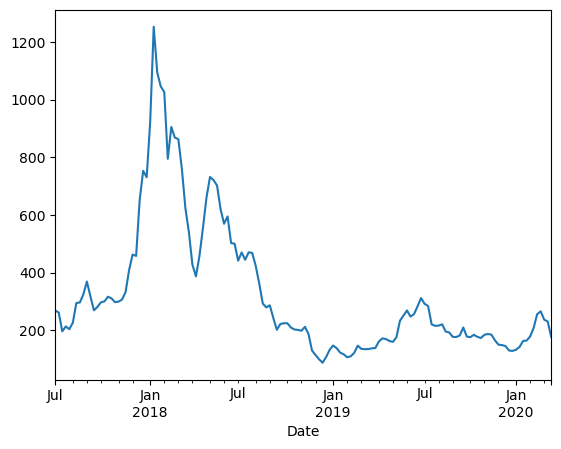

In [205]:
avg_closing_prices.plot()

***
DataFrame objects can also be resampled

In [211]:
eth_df.resample('W').max()

,Day,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2017-07-02,Sunday,ETHUSD,292.54,293.73,284.87,292.54,7081816.11
2017-07-09,Wednesday,ETHUSD,285.00,285.00,282.31,282.58,6082287.50
2017-07-16,Wednesday,ETHUSD,238.81,240.33,238.00,238.47,23582117.48
2017-07-23,Wednesday,ETHUSD,245.55,249.40,234.97,245.55,31082353.62
2017-07-30,Wednesday,ETHUSD,229.96,229.99,229.60,229.96,9214814.73
...,...,...,...,...,...,...,...
2020-02-16,Wednesday,ETHUSD,286.39,290.00,285.10,286.39,13323454.31
2020-02-23,Wednesday,ETHUSD,285.30,287.13,282.00,285.30,12085035.32
2020-03-01,Wednesday,ETHUSD,276.91,278.13,274.28,276.91,19074673.60


However, applying a single method on every column in the dataframe is impractical usually. To specify a method for each column, use .agg

In [223]:
eth_df.resample('W').agg({'Open': 'mean', 'Close': 'mean', 'High': 'max', 'Low': 'min'})
#any columns that do not have a method applied will not be in the temporary view dataframe

,Open,Close,High,Low
Date,,,,
2017-07-02,268.066486,268.202162,293.73,253.23
2017-07-09,261.337024,261.062083,285.00,231.25
2017-07-16,196.193214,195.698393,240.33,130.26
2017-07-23,212.351429,212.783750,249.40,153.25
2017-07-30,203.496190,203.309524,229.99,178.03
...,...,...,...,...
2020-02-16,255.021667,255.198452,290.00,216.31
2020-02-23,265.220833,265.321905,287.13,242.36
2020-03-01,236.720536,236.373988,278.13,209.26


In [225]:
eth_df.resample('W').agg(dict(zip(['Open', 'Close', 'High', 'Low'], ['mean', 'mean', 'max', 'min'])))
#dict(zip()) can be used for more convenience

,Open,Close,High,Low
Date,,,,
2017-07-02,268.066486,268.202162,293.73,253.23
2017-07-09,261.337024,261.062083,285.00,231.25
2017-07-16,196.193214,195.698393,240.33,130.26
2017-07-23,212.351429,212.783750,249.40,153.25
2017-07-30,203.496190,203.309524,229.99,178.03
...,...,...,...,...
2020-02-16,255.021667,255.198452,290.00,216.31
2020-02-23,265.220833,265.321905,287.13,242.36
2020-03-01,236.720536,236.373988,278.13,209.26
